# Development: Polarizer Class
<b>8/7/2018</b>
<hr>
Space to develop and test basic functionality of `Polarizer` class.

## Load Sample Data

In [4]:
from pymongo import MongoClient

In [5]:
# get mongodb collections
client = MongoClient()

reviews = client.amazon_reviews.reviews
metadata = client.amazon_reviews.metadata

In [7]:
# check collections connected
print(reviews.estimated_document_count())
print(metadata.estimated_document_count())

13272
30000


## Examine Reviews

In [8]:
test = reviews.find_one()
test

{'_id': ObjectId('5b71de31201fd5bb2b0ad8fb'),
 'reviewerID': 'A2QK7UNJ857YG',
 'asin': 'B00002N674',
 'reviewerName': 'Jason',
 'helpful': [0, 0],
 'reviewText': "I probably should have bought something a bit more flexible and less rugged since I constantly coil/uncoil it for washing cars, but that's my fault not a product fault.",
 'overall': 5.0,
 'summary': 'Very high quality',
 'unixReviewTime': 1373846400,
 'reviewTime': '07 15, 2013'}

In [9]:
# get sample of reviews
# NOTE: Changes every time it's run. May affect notes below.
sample_reviews = [review for review in reviews.find(limit=100)]

In [10]:
def print_reviews(reviews):
    for r in reviews:
        print(r['reviewText'])
        print('--------------------')

In [11]:
print_reviews(sample_reviews)

I probably should have bought something a bit more flexible and less rugged since I constantly coil/uncoil it for washing cars, but that's my fault not a product fault.
--------------------
This is a high quality 8 ply hose. I have had good luck with Gilmour hoses in the past. A good choice in hoses.
--------------------
Good USA company that stands behind their products. I have had to warranty two hoses and they send replacements right out to you. I had one burst after awhile, you could see it buldge for weeks before it went so no suprises. The other one was winter related as I am bad and leave them out most of the time. Highly reccomend. Note the hundred footer is heavy and like wresting an anaconda when its time to put away, but it does have a far reach.
--------------------
I'll buy more of these come  Spring. Holding up very well to the extreme heat and cold of Idaho.  A bit on the heavy side, but that is what makes them last so well.
--------------------
So far so good! I have no

## Create Occurance Matrix, Vocabulary

In [12]:
import math
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
# create count vectorizer
count_vectorizer = CountVectorizer(decode_error='ignore',
                                   stop_words='english',
                                   binary=True,
                                   min_df=0.05)

In [14]:
# create occurance matrix, corpus vocabulary
# NOTE: occurance matrix is term-document (rows are terms, columns are docs)
occurrence_matrix = count_vectorizer.fit_transform((review['reviewText'] for review in sample_reviews)).transpose()
vocab = count_vectorizer.get_feature_names()

In [15]:
# get pos words
with open('../data/positive-words.txt', errors='ignore') as f:
    pos_words = [line.strip() for line in f.readlines() if ';' not in line]

In [16]:
# get neg words
with open('../data/negative-words.txt', errors='ignore') as f:
    neg_words = [line.strip() for line in f.readlines() if ';' not in line]

In [17]:
# filter pos and neg words
pos_words = [w for w in pos_words if w in vocab]
neg_words = [w for w in neg_words if w in vocab]

## Test Polarizer Methods

In [22]:
# append project to sys.path
import sys
sys.path.append('/Users/robertdalton/web-projects/feature-extractor')

In [23]:
from polarizer import Polarizer

In [24]:
pol = Polarizer(vocab, occurrence_matrix, pos_words, neg_words)

In [65]:
# test word polarity
pol._get_word_polarity('deal')

0.11027913869834094

In [66]:
# test document polarity
pol.get_document_polarity(sample_reviews[0]['reviewText'])

0.13458510595478876

## Analysis of Polarization Measures

Now that we've a successful way to obtain polarity, we need to ask: how good is our measure? Let's take a look at the scores for a few sample reviews:

In [70]:
# add polarity to sample reviews
for review in sample_reviews:
    review['polarity'] = pol.get_document_polarity(review['reviewText'])

In [78]:
# examine polarity, rating for each review
for i, review in enumerate(sample_reviews):
    print(i, '\t', round(review['polarity'], 4), '\t', review['overall'])

0 	 0.1346 	 5.0
1 	 0.026 	 5.0
2 	 0.1659 	 4.0
3 	 0.1064 	 5.0
4 	 0.0896 	 4.0
5 	 0.0111 	 5.0
6 	 0.0453 	 5.0
7 	 0.0567 	 5.0
8 	 0.0799 	 4.0
9 	 0.0473 	 5.0
10 	 -0.0304 	 5.0
11 	 0.1022 	 4.0
12 	 0.1072 	 5.0
13 	 0.1318 	 5.0
14 	 0.2327 	 5.0
15 	 0.1059 	 5.0
16 	 0.1172 	 5.0
17 	 0.1812 	 5.0
18 	 0.062 	 5.0
19 	 0.0734 	 5.0
20 	 0.0496 	 5.0
21 	 0.1081 	 4.0
22 	 0.0748 	 5.0
23 	 0.1117 	 4.0
24 	 0.2221 	 5.0
25 	 0.1455 	 5.0
26 	 0.1184 	 2.0
27 	 0.1537 	 4.0
28 	 0.1509 	 4.0
29 	 0.1295 	 5.0
30 	 0.1804 	 4.0
31 	 0.1817 	 3.0
32 	 0.158 	 2.0
33 	 0.1599 	 5.0
34 	 0.1633 	 5.0
35 	 0.1709 	 3.0
36 	 0.0664 	 5.0
37 	 0.0933 	 5.0
38 	 0.0803 	 3.0
39 	 0.0941 	 5.0
40 	 0.1315 	 5.0
41 	 0.153 	 5.0
42 	 0.0039 	 5.0
43 	 0.0984 	 4.0
44 	 0.098 	 1.0
45 	 0.0409 	 5.0
46 	 0.1859 	 5.0
47 	 0.1216 	 5.0
48 	 0.2073 	 3.0
49 	 0.1326 	 5.0
50 	 0.1152 	 5.0
51 	 0.1667 	 5.0
52 	 0.0928 	 1.0
53 	 0.1621 	 5.0
54 	 0.227 	 5.0
55 	 0.2326 	 5.0
56 	 0.

In [85]:
# NOTE: As of 11:00AM, 8/13, averages for document and word polarities were incorrect.
#       Examined using code below.
import string

# test document polarity by hand
test_doc = sample_reviews[2]['reviewText']
test_doc_words = (w.strip(string.punctuation).lower() for w in test_doc.split())
test_word_polarities = []
for w in test_doc_words:
    if w in vocab:
        test_word_polarities.append(pol._get_word_polarity(w))
        
sum(test_word_polarities) / len(test_word_polarities)

0.16591042351473545

In [95]:
# Examine text for negative review with positive polarity
# sample_reviews[52]['reviewText']

hose_review = {
    # '_id': ObjectId('5b71de31201fd5bb2b0ad92f'),
    'reviewerID': 'A2X06FP2PQ6EK0',
    'asin': 'B00002N8K3',
    'reviewerName': 'S. A. ROBBINS "shirley_rw"',
    'helpful': [161, 195],
    'reviewText': 'I purchased 6 of these hoses with what was supposed to be a lifetime guarantee. After a short time, the end on one of the hoses started leaking so I contacted the manufacturer and got a replacement. A year later another hose started leaking and I got another replacement. Then another hose started leaking but the company would no longer honor the warranty! Now Gilmour is selling them. But it\'s the same hose - "Flexogen". The hose itself it actually quite good if you don\'t mind replacing the hose ends eventually, I\'ve had to replace every end on every Flexogen hose that I have.Keep in mind that I bought hoses from Flexogen but that company no longer exists and Gilmour would not honor the warranty on those hoses even though Gilmour is now selling them. Also note that Flexogen is a patented hose. Lifetime warranty isn\'t much good when the company gets bought or taken over by another company and the new company (Gilmour) won\'t honor the warranty. And who wants to have to keep sending in hose parts to get a replacement every year or two.Let me reiterate, Gilmour would not honor the warranty on my Flexogen hoses. I wrote to them multiple times and was told (without explanation) that Gilmour would not replace the defective hoses. If you buy these hoses expecting a lifetime warranty, you may not get it.On the Gilmour website, there is no longer any information relating to Flexogen hose warranty or on how to have a Flexogen hose replaced.  On Amazon, it does say "This heavy-duty garden hose is made in the USA and backed by a lifetime guarantee". It also says Lifetime Guarantee on the front of the hose package. Gilmour is now owned by the Robert Bosch Corp., so probably even less chance of getting a warranty replacement.',
    'overall': 1.0,
    'summary': 'Not As Good As It Looks!',
    'unixReviewTime': 1078099200,
    'reviewTime': '03 1, 2004',
    'polarity': 0.092814749960172
}

hose_review['reviewText']

'I purchased 6 of these hoses with what was supposed to be a lifetime guarantee. After a short time, the end on one of the hoses started leaking so I contacted the manufacturer and got a replacement. A year later another hose started leaking and I got another replacement. Then another hose started leaking but the company would no longer honor the warranty! Now Gilmour is selling them. But it\'s the same hose - "Flexogen". The hose itself it actually quite good if you don\'t mind replacing the hose ends eventually, I\'ve had to replace every end on every Flexogen hose that I have.Keep in mind that I bought hoses from Flexogen but that company no longer exists and Gilmour would not honor the warranty on those hoses even though Gilmour is now selling them. Also note that Flexogen is a patented hose. Lifetime warranty isn\'t much good when the company gets bought or taken over by another company and the new company (Gilmour) won\'t honor the warranty. And who wants to have to keep sending 

In [96]:
meta = metadata.find({'asin': hose_review['asin']}).next()
print('Name:\n', meta['title'], '\n')
print('Categories:\n', meta['categories'][0])

Name:
 Gilmour Flexogen 10058100 8-Ply Hose 5/8-inch by 100-foot 

Categories:
 ['Patio, Lawn & Garden', 'Gardening & Lawn Care', 'Watering Equipment', 'Hoses & Accessories', 'Garden Hoses']


### Why does a negative review have a positive polarity?
In this case, it's because the words indicating a negative opinion (`leaking`, `not replace`, `replace`, etc) do not have significant PMI values with negative words.

This may be because these words are domain specific - they carry special meaning in the context of the 'Watering Equipment', 'Hoses & Accesories', and 'Garden Hoses' product categories.

### What's the solution?
A solution would be to train polarizers on specific product domains - e.g. specific product categories. Narrowing the corpus a Polarizer is trained on will help isolate context, which will help words to have a more consistent semantic meaning accross reviews.

tldr; the solution is to train polarizers using reviews from specific categories. But, which ones? How granular do we take it? At the category or product level? And how much will this improve things?

## Test Polarity on Reviews, Most Specific Category Level
At a glance, it seems that the `categories` field in the metadata is arranged by specificity: the most broad category at the front of the list, and the most specific category at the end.

In [98]:
# examine product name, categories
meta = metadata.find_one()
print('Name:\n', meta['title'], '\n')
print('Categories:\n', meta['categories'][0])

Name:
 Sand Shark Margare Maron Audio CD 

Categories:
 ['Patio, Lawn & Garden', 'Lawn Mowers & Outdoor Power Tools', 'Metal Detectors']


Let's attempt to train and test a Polarizer on reviews from the rightmost category of a product.

#### Select Category, get reviews

In [253]:
# get asins from products in category
query = metadata.find({
    '$where': """function() {return this.categories[0].includes("Hoses & Accessories")}""",
})

asins = [r['asin'] for r in query]

In [254]:
# get reviews from products in category
cat_reviews = [r for r in reviews.find({'asin': {'$in': asins}})]

In [255]:
len(cat_reviews)

332

#### Get occurance matrix, vocab

In [256]:
# create occurance matrix, corpus vocabulary
# NOTE: occurance matrix is term-document (rows are terms, columns are docs)
occurrence_matrix = count_vectorizer.fit_transform((review['reviewText'] for review in cat_reviews)).transpose()
vocab = count_vectorizer.get_feature_names()

# get pos words
with open('../data/positive-words.txt', errors='ignore') as f:
    pos_words = [line.strip() for line in f.readlines() if ';' not in line]

# get neg words
with open('../data/negative-words.txt', errors='ignore') as f:
    neg_words = [line.strip() for line in f.readlines() if ';' not in line]

# filter pos and neg words
pos_words = [w for w in pos_words if w in vocab]
neg_words = [w for w in neg_words if w in vocab]

# create polarizer
pol = Polarizer(vocab, occurrence_matrix, pos_words, neg_words)

In [257]:
# add polarity to category reviews
# NOTE: For performance, should calculate PMI for all words in corpus. Eliminates need to calculate for every review
for review in cat_reviews:
    review['polarity'] = pol.get_document_polarity(review['reviewText'])

In [259]:
# examine polarity, rating for each review
for i, review in enumerate(cat_reviews):
    if review.get('polarity') and review['overall'] < 3.0:
        print(i, '\t', round(review.get('polarity'), 4), '\t', review['overall'])

20 	 0.0665 	 1.0
22 	 0.0268 	 1.0
26 	 0.1556 	 2.0
30 	 0.0699 	 1.0
38 	 0.0685 	 2.0
46 	 0.0993 	 2.0
48 	 0.0877 	 2.0
76 	 -0.0093 	 1.0
80 	 0.0401 	 1.0
102 	 0.0569 	 1.0
117 	 0.0097 	 1.0
154 	 0.0904 	 2.0
177 	 0.0109 	 1.0
184 	 0.1175 	 2.0
200 	 -0.103 	 2.0
202 	 0.1891 	 2.0
203 	 0.0417 	 2.0
302 	 0.1892 	 2.0
309 	 0.0332 	 2.0
311 	 -0.0726 	 1.0
322 	 0.0951 	 2.0
324 	 -0.0289 	 1.0
325 	 0.0262 	 2.0
326 	 0.0754 	 1.0
327 	 0.0227 	 1.0
330 	 0.0756 	 1.0


In [267]:
import pandas as pd

elements = [[r.get('polarity'), r.get('overall')] for r in cat_reviews]

df = pd.DataFrame(elements,
                  columns=['Polarity', 'Rating'])

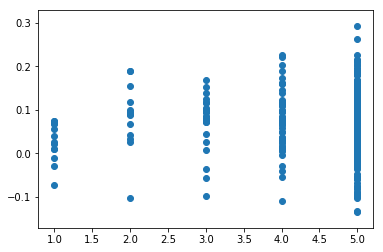

In [272]:
import matplotlib

%matplotlib inline
matplotlib.pyplot.scatter(df.Rating, df.Polarity);

In [234]:
pol.get_document_polarity(cat_reviews[131]['reviewText'])

0.26422862321888685

In [245]:
pol._get_word_polarity('good')

0.16635546175943916

In [241]:
test_words = [w.strip(string.punctuation).lower() for w in cat_reviews[131]['reviewText'].split()]

In [247]:
for word in [w for w in test_words if w in vocab]:
    print(pol._get_word_polarity(word))

0.3607174563389643
0.26328170307526066
0.26328170307526066
0.4045231393840245
0.02933911422092403


In [248]:
neg_words

['cheap', 'hard', 'leak', 'leaking', 'leaks', 'problem']

In [249]:
pos_words

['best',
 'better',
 'easier',
 'easy',
 'fine',
 'free',
 'good',
 'great',
 'like',
 'love',
 'nice',
 'perfect',
 'recommend',
 'right',
 'sturdy',
 'work',
 'works']